In [134]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("/Users/sebastianonise/Documents/ML/churn-detector/jupyter/data/original (73).jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


In [135]:
height, width = gray.shape
center_x = width // 2
crop_width = 30
groove_crop = gray[:, center_x - crop_width // 2:center_x + crop_width // 2]


In [136]:
enhanced = cv2.equalizeHist(groove_crop)


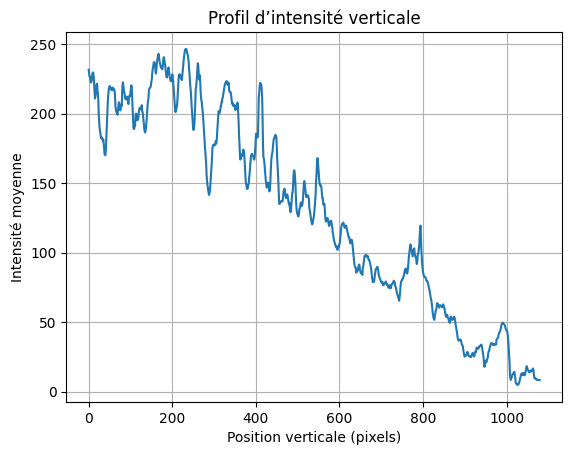

In [137]:
intensity_profile = np.mean(enhanced, axis=1)
plt.plot(intensity_profile[::-1])  # haut en bas
plt.title("Profil d’intensité verticale")
plt.xlabel("Position verticale (pixels)")
plt.ylabel("Intensité moyenne")
plt.grid(True)
plt.show()


In [138]:
min_pos = np.argmin(intensity_profile)
search_region = intensity_profile[:min_pos]
surface_pos = np.argmax(search_region)

# Témoin d'usure ≈ pic intermédiaire
gradient = np.gradient(search_region)
inflections = np.where((gradient[:-1] > 0) & (gradient[1:] < 0))[0]
wear_pos = inflections[len(inflections) // 2] if len(inflections) else (surface_pos + min_pos) // 2


In [139]:
pixels_between_surface_and_wear = surface_pos - wear_pos
pixels_per_mm = pixels_between_surface_and_wear / 1.6
total_depth_pixels = surface_pos - min_pos
estimated_mm = total_depth_pixels / pixels_per_mm
print(f"Profondeur estimée : {estimated_mm:.2f} mm")


Profondeur estimée : -33.60 mm
